In [1]:
library(GLMsData)
data(punting)

In [2]:
str(punting)

'data.frame':	13 obs. of  3 variables:
 $ Left : int  170 130 170 160 150 150 180 110 110 120 ...
 $ Right: int  170 140 180 160 170 150 170 110 120 130 ...
 $ Punt : num  162 144 174 164 192 ...


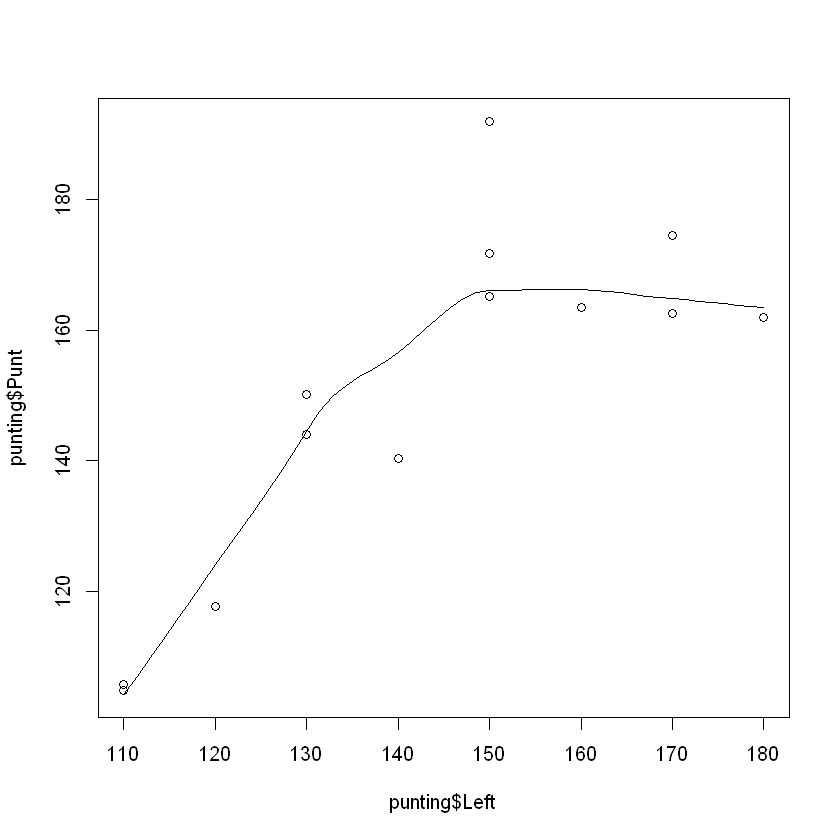

In [3]:
scatter.smooth(punting$Punt ~ punting$Left)

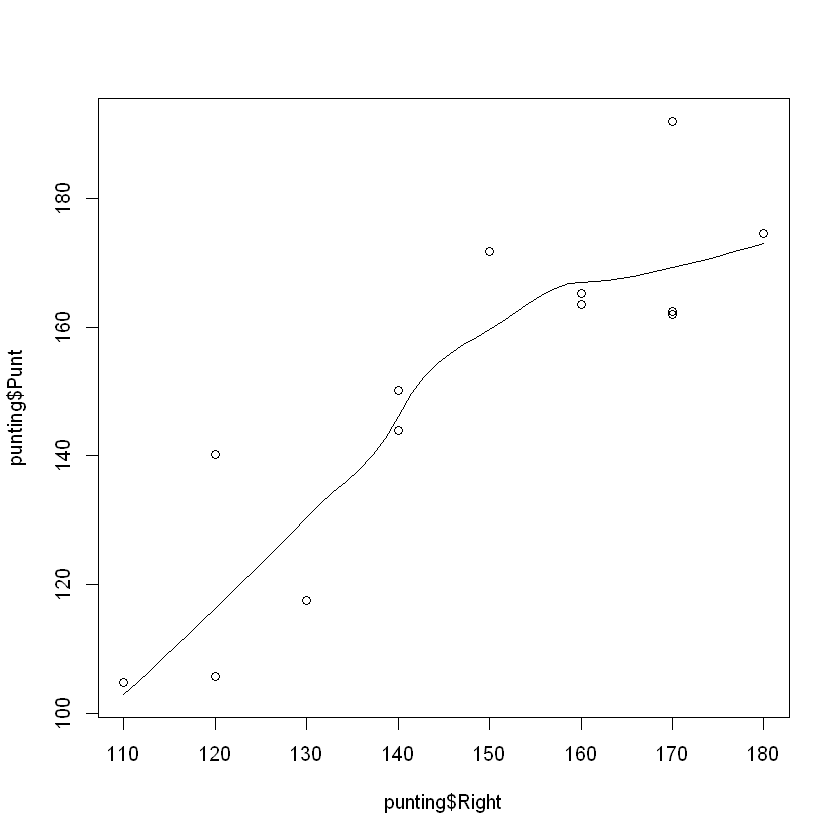

In [4]:
scatter.smooth(punting$Punt ~ punting$Right)

In [5]:
cor(punting)

,Left,Right,Punt
Left,1.0000000,0.8957224,0.8117368
Right,0.8957224,1.0000000,0.8805469
Punt,0.8117368,0.8805469,1.0000000


In [8]:
lm.1 <- lm(Punt ~ Left + Right, data=punting)

In [9]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.1644653,26.6779451,-0.1935856,0.85037599
Left,0.1369950,0.3943516,0.3473932,0.73549646
Right,0.9192069,0.3967784,2.3166759,0.04301561


In [10]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Left,1,5756.550,5756.5496,29.686481,0.000281439
Right,1,1040.720,1040.7205,5.366987,0.043015612
Residuals,10,1939.115,193.9115,NA,NA


In [11]:
lm.2 <- lm(Punt ~ Left, data=punting)

In [12]:
coef(summary(lm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.8833780,30.1575441,0.4272025,0.6774740156
Left,0.9553134,0.2072357,4.6097921,0.0007528003


In [13]:
anova(lm.2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Left,1,5756.550,5756.5496,21.25018,0.0007528003
Residuals,11,2979.835,270.8941,NA,NA


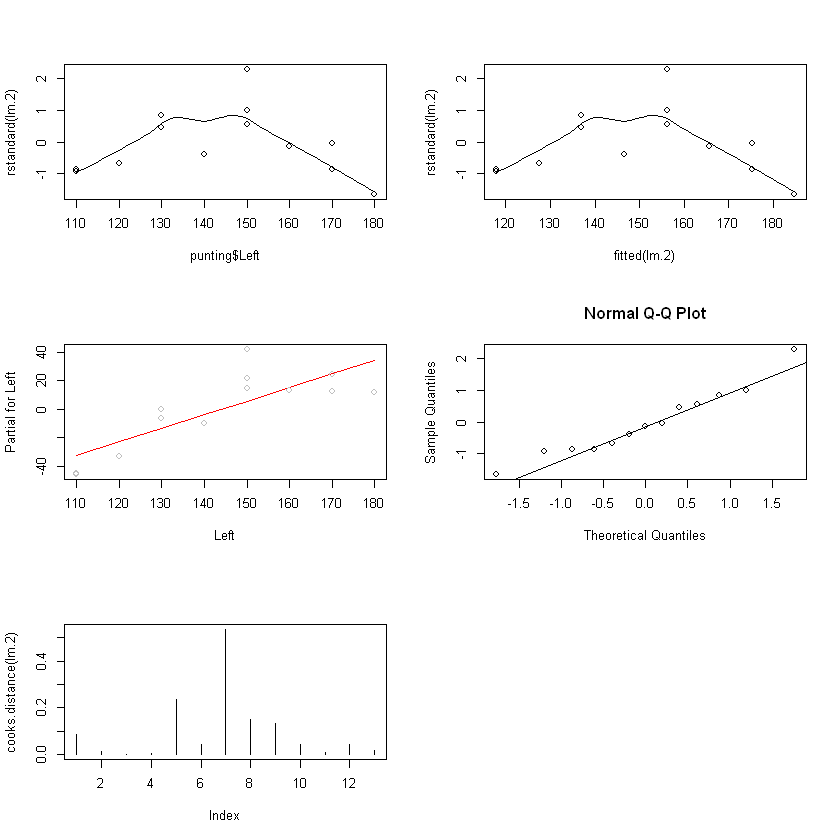

In [14]:
par(mfrow=c(3, 2))

scatter.smooth(rstandard(lm.2) ~ punting$Left)
scatter.smooth(rstandard(lm.2) ~ fitted(lm.2))
termplot(lm.2, partial.resid = TRUE, terms="Left")
qqnorm(rstandard(lm.2))
qqline(rstandard(lm.2))
plot(cooks.distance(lm.2), type="h")

In [16]:
rowSums(influence.measures(lm.2)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 
 0  0  0  0  1  0  0  0  0  0  0  0  0